# Laboratorio di simulazione numerica

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string

### Exercise 06.1
In this exercise I simulated a one-dimensional Ising model with periodic boundary conditions, using Monte Carlo methods.
To sample the next state in the chain I used both the Metropolis algorithm and the Gibbs algorithm: the plots below (i.e. the values of some physical quantities of interest as a function of the temperature) compare the results of the two sampling algorithms against the analytical values, obtained from the exact solution of the model.

Input parameters (in reduced units):

| Quantity | Value |
| --- | --- |
| Interaction energy | 1 |
| External magnetic field | 0.02|
| Number of sites | 50 |
| Total simulation steps | 24000 |
| Block size | 100 |
| Equilibration steps | 4000 |

In [2]:
# Common parameters
temperature_list = np.linspace(0.4, 2.6, num=100)
J                = 1.0
h                = 0.02
n_spins          = 50

beta             = 1 / temperature_list
th               = np.tanh(beta * J)
thN              = th**n_spins

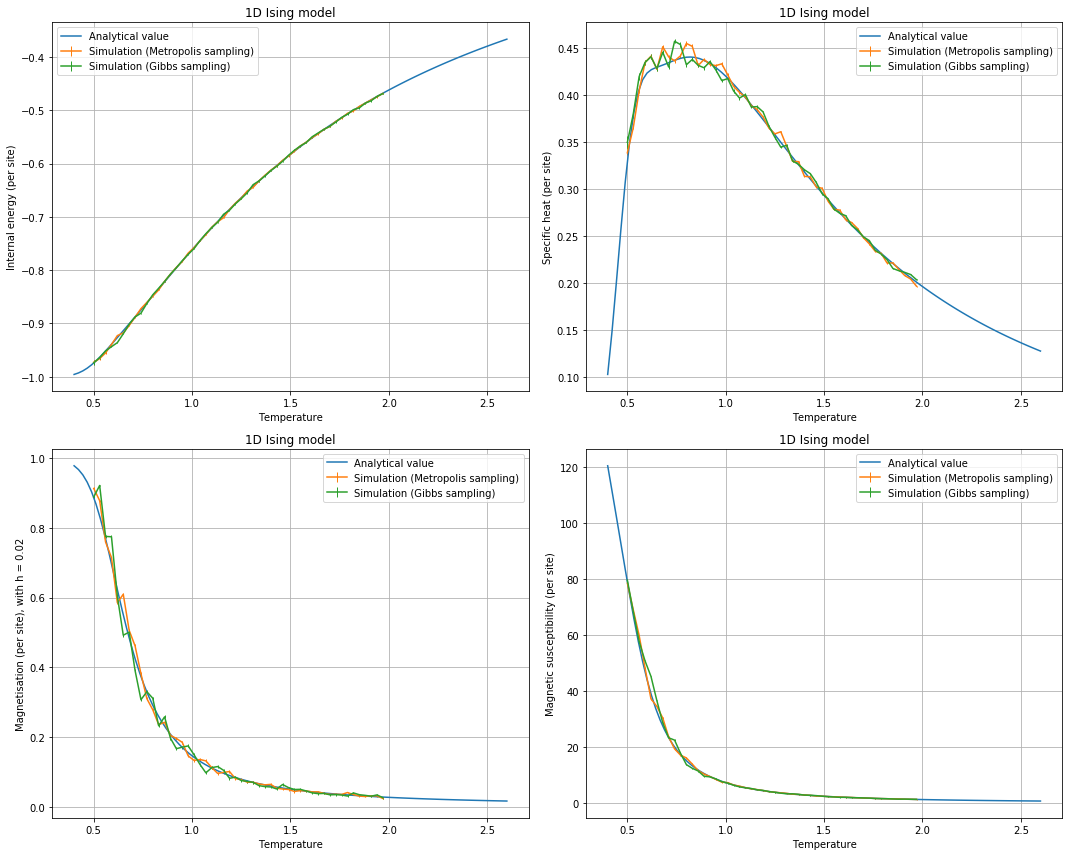

In [3]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 12))
axes = axes.flatten()

# Internal energy
# ---------------
# Since the simulations outputs the total internal energy, I divide it here by the number
# of spins in order to be able to compare it to the expected curve. The same holds for
# the other three quantities plotted below.
axes[0].set_ylabel('Internal energy (per site)')

ch = 1/th
exp_energy = -J * (th + ch * thN) / (1 + thN)
axes[0].plot(
    temperature_list,
    exp_energy,
    label = "Analytical value"
)

temperature, u_avg, u_err = np.loadtxt("internal_energy_metropolis.dat", unpack = True)
axes[0].errorbar(
    temperature,
    u_avg / n_spins,
    yerr = u_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Metropolis sampling)"
)

temperature, u_avg, u_err = np.loadtxt("internal_energy_gibbs.dat", unpack = True)
axes[0].errorbar(
    temperature,
    u_avg / n_spins,
    yerr = u_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Gibbs sampling)"
)


# Specific heat
# -------------
axes[1].set_ylabel('Specific heat (per site)')

exp_specific_heat = ((beta * J)**2) * (
        ((1 + thN + (n_spins - 1) * (th**2) + (n_spins - 1) * (ch**2) * thN) / (1 + thN)) -
        n_spins *((th + ch * thN) / (1 + thN))**2
)
axes[1].plot(
    temperature_list,
    exp_specific_heat,
    label = "Analytical value"
)

temperature, c_avg, c_err = np.loadtxt("specific_heat_metropolis.dat", unpack = True)
axes[1].errorbar(
    temperature,
    c_avg / n_spins,
    yerr = c_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Metropolis sampling)"
)

temperature, c_avg, c_err = np.loadtxt("specific_heat_gibbs.dat", unpack = True)
axes[1].errorbar(
    temperature,
    c_avg / n_spins,
    yerr = c_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Gibbs sampling)"
)
axes[1].set_ylabel('Specific heat (per site)')


# Magnetisation
# -------------
axes[2].set_ylabel('Magnetisation (per site), with h = 0.02')

l1 = (np.exp(beta * J) * np.cosh(beta * h) +
    np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) - 2 * np.sinh(2 * beta * J)))
l2 = (np.exp(beta * J) * np.cosh(beta * h) -
    np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) - 2 * np.sinh(2 * beta * J)))
Z = l1**n_spins + l2**n_spins
exp_magnetisation = 1 / Z * (np.exp(beta * J) * np.sinh(beta * h) * (
        (l1**(n_spins-1)) *
        (1 + np.exp(beta * J) * np.cosh(beta * h) / np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) -
            2 * np.sinh(2 * beta * J))) +
        (l2**(n_spins - 1)) *
        (1 - np.exp(beta * J) * np.cosh(beta * h) / np.sqrt(np.exp(2 * beta * J) * np.cosh(beta * h) * np.cosh(beta * h) -
            2 * np.sinh(2 * beta * J)))
        )
    )
axes[2].plot(
    temperature_list,
    exp_magnetisation,
    label = "Analytical value"
)

temperature, m_avg, m_err = np.loadtxt("magnetisation_metropolis.dat", unpack = True)
axes[2].errorbar(
    temperature,
    m_avg / n_spins,
    yerr = m_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Metropolis sampling)"
)

temperature, m_avg, m_err = np.loadtxt("magnetisation_gibbs.dat", unpack = True)
axes[2].errorbar(
    temperature,
    m_avg / n_spins,
    yerr = m_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Gibbs sampling)"
)

# Magnetic susceptibility
# -----------------------
axes[3].set_ylabel('Magnetic susceptibility (per site)')

exp_mag_susceptibility = beta * np.exp(2 * beta * J) * (1 - thN) / (1 + thN)
axes[3].plot(
    temperature_list,
    exp_mag_susceptibility,
    label = "Analytical value"
)

temperature, x_avg, x_err = np.loadtxt("magnetic_susceptibility_metropolis.dat", unpack = True)
axes[3].errorbar(
    temperature,
    x_avg / n_spins,
    yerr = x_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Metropolis sampling)"
)

temperature, x_avg, x_err = np.loadtxt("magnetic_susceptibility_gibbs.dat", unpack = True)
axes[3].errorbar(
    temperature,
    x_avg / n_spins,
    yerr = x_err / n_spins,
    elinewidth = 1,
    label = "Simulation (Gibbs sampling)"
)

for ax in axes:
    ax.set_title("1D Ising model")
    ax.set_xlabel("Temperature")
    ax.grid(True)
    ax.legend()

fig.tight_layout()
plt.show()